Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [51]:
NAME = "Navid Jery Pulikkottil"
COLLABORATORS = ""

---

## 1. Loading Dataset

In [52]:
!pip show huggingface_hub

Name: huggingface-hub
Version: 0.26.5
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /home/np966/.local/lib/python3.12/site-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: 


In [53]:
import pandas as pd

# Dataset obtained from Hugging Face: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

songs = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

songs.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [54]:
songs.shape

(114000, 21)

## 2. Cleaning Dataset

In [55]:
# Remove first column as it is unneeded

songs.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
# Find missing or duplicate values and then remove them

(songs.isna().sum() / len(songs)) * 100

track_id            0.000000
artists             0.000877
album_name          0.000877
track_name          0.000877
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
track_genre         0.000000
dtype: float64

In [57]:
# Since % of missing rows is very small (0.000877%), remove all missing rows
songs = songs.dropna()

In [58]:
# Find rows that have duplicate track ids (which means the same song)
songs['track_id'].duplicated().sum()

24259

In [59]:
songs.drop_duplicates(subset='track_id', keep='first', inplace=True)

In [60]:
# Find rows that have still have duplicate artists & track names
songs[['artists', 'track_name']].duplicated().sum()

8397

In [61]:
songs.drop_duplicates(subset=['artists', 'track_name'], keep='first', inplace=True)

Dataset has been cleaned.

## 3. Exploratory Data Analysis

In [62]:
# Overview of dataset
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          81343 non-null  object 
 1   artists           81343 non-null  object 
 2   album_name        81343 non-null  object 
 3   track_name        81343 non-null  object 
 4   popularity        81343 non-null  int64  
 5   duration_ms       81343 non-null  int64  
 6   explicit          81343 non-null  bool   
 7   danceability      81343 non-null  float64
 8   energy            81343 non-null  float64
 9   key               81343 non-null  int64  
 10  loudness          81343 non-null  float64
 11  mode              81343 non-null  int64  
 12  speechiness       81343 non-null  float64
 13  acousticness      81343 non-null  float64
 14  instrumentalness  81343 non-null  float64
 15  liveness          81343 non-null  float64
 16  valence           81343 non-null  float64
 1

In [63]:
songs.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,19.438517,1.164924e+05,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,2.152050e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Displaying plots to understand relationship between variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying heatmap of correlations between numeric variables
numeric_variables = songs.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_variables.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Visualizing the correlation between the variables with the strongest correlations based on the heatmap above
# They are loudness & energy, acousticness & energy, and loudness & acousticness

sns.pairplot(songs[['loudness', 'energy', 'acousticness']])
plt.show()

In [ ]:
# Bar chart for 20 most common genres_count_sorted
genre_counts = songs.groupby(['track_genre', 'explicit']).size().reset_index(name='count')
most_common_genres = songs['track_genre'].value_counts().head(20).index
common_genre_counts = genre_counts[genre_counts['track_genre'].isin(most_common_genres)]

plt.figure(figsize=(12, 8))
sns.barplot(data=common_genre_counts, x='track_genre', y='count', hue='explicit')

plt.xticks(rotation=55)
plt.title('Top 20 Most Common Genres with Explicit vs Non-Explicit Counts')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.tight_layout()

plt.show()

### Setting up SQL database and running queries

In [67]:
import sqlite3

conn = sqlite3.connect('songs.db')
cursor = conn.cursor()

# The SQL table will have the same format as the pandas dataframe
songs.to_sql(name='songs', con=conn, if_exists='replace', index=False)

81343

In [68]:
def run_query(query):
    cursor.execute(query)
    return cursor.fetchall()

In [69]:
# Make sure SQL table has correct information
run_query('PRAGMA table_info(songs)')

[(0, 'track_id', 'TEXT', 0, None, 0),
 (1, 'artists', 'TEXT', 0, None, 0),
 (2, 'album_name', 'TEXT', 0, None, 0),
 (3, 'track_name', 'TEXT', 0, None, 0),
 (4, 'popularity', 'INTEGER', 0, None, 0),
 (5, 'duration_ms', 'INTEGER', 0, None, 0),
 (6, 'explicit', 'INTEGER', 0, None, 0),
 (7, 'danceability', 'REAL', 0, None, 0),
 (8, 'energy', 'REAL', 0, None, 0),
 (9, 'key', 'INTEGER', 0, None, 0),
 (10, 'loudness', 'REAL', 0, None, 0),
 (11, 'mode', 'INTEGER', 0, None, 0),
 (12, 'speechiness', 'REAL', 0, None, 0),
 (13, 'acousticness', 'REAL', 0, None, 0),
 (14, 'instrumentalness', 'REAL', 0, None, 0),
 (15, 'liveness', 'REAL', 0, None, 0),
 (16, 'valence', 'REAL', 0, None, 0),
 (17, 'tempo', 'REAL', 0, None, 0),
 (18, 'time_signature', 'INTEGER', 0, None, 0),
 (19, 'track_genre', 'TEXT', 0, None, 0)]

In [70]:
# Obtain 20 most popular genres
run_query('''
SELECT track_genre, AVG(popularity) FROM songs
GROUP BY track_genre
ORDER BY AVG(popularity) DESC
LIMIT 20;
''')

[('k-pop', 59.33489461358314),
 ('pop-film', 59.12252475247525),
 ('metal', 56.45070422535211),
 ('pop', 55.90635451505017),
 ('chill', 55.145054945054945),
 ('hip-hop', 52.52503793626707),
 ('sad', 51.80783582089552),
 ('latino', 51.174698795180724),
 ('grunge', 50.56317204301075),
 ('singer-songwriter', 49.83101851851852),
 ('indian', 49.78808864265928),
 ('emo', 49.53579676674365),
 ('piano', 49.02906976744186),
 ('edm', 48.733333333333334),
 ('anime', 48.63694267515923),
 ('sertanejo', 47.89290161892902),
 ('indie-pop', 47.561290322580646),
 ('progressive-house', 47.08124076809453),
 ('house', 46.92537313432836),
 ('hard-rock', 46.766773162939295)]

In [71]:
# Find the 10 most popular genres among the 30 least common genres

run_query('''
WITH least_common_genres AS (
    SELECT track_genre,
           AVG(popularity) AS avg_popularity,
           COUNT(*) AS song_count
    FROM songs
    GROUP BY track_genre
    ORDER BY song_count
    LIMIT 30
)
SELECT track_genre,
       avg_popularity,
       song_count
FROM least_common_genres
ORDER BY avg_popularity DESC
LIMIT 10;
''')

[('metal', 56.45070422535211, 213),
 ('pop', 55.90635451505017, 299),
 ('sad', 51.80783582089552, 536),
 ('latino', 51.174698795180724, 332),
 ('singer-songwriter', 49.83101851851852, 432),
 ('edm', 48.733333333333334, 510),
 ('indie-pop', 47.561290322580646, 465),
 ('house', 46.92537313432836, 134),
 ('electro', 45.984375, 384),
 ('reggaeton', 44.77777777777778, 63)]

In [72]:
# Obtain average features of explicit vs non-explicit songs
result = run_query('''
SELECT explicit, COUNT(*), AVG(popularity), AVG(duration_ms), AVG(loudness), AVG(tempo), AVG(danceability), AVG(energy), AVG(valence)
FROM songs
GROUP BY explicit;
''')
for item in result:
    print(f"Explicit: {item[0]==1}")
    print(f"Count: {item[1]:.2f}, Popularity: {item[2]:.2f}, Duration: {item[3]:.2f}, Loudness: {item[4]:.2f}")
    print(f"Tempo: {item[5]:.2f}, Danceability: {item[6]:.2f}, Energy: {item[7]:.2f}, Valence: {item[8]:.2f}\n")

Explicit: False
Count: 74385.00, Popularity: 34.26, Duration: 233790.66, Loudness: -8.77
Tempo: 122.20, Danceability: 0.55, Energy: 0.63, Valence: 0.46

Explicit: True
Count: 6958.00, Popularity: 38.69, Duration: 206011.99, Loudness: -6.74
Tempo: 121.57, Danceability: 0.62, Energy: 0.72, Valence: 0.46



In [73]:
# Obtain average features for songs in each key
# Obtain average features of explicit vs non-explicit songs
result = run_query('''
SELECT key, COUNT(*), AVG(popularity), AVG(duration_ms), AVG(loudness), AVG(tempo), AVG(danceability), AVG(energy), AVG(valence)
FROM songs
GROUP BY key;
''')
for item in result:
    print(f"Key: {item[0]}")
    print(f"Count: {item[1]:.2f}, Popularity: {item[2]:.2f}, Duration: {item[3]:.2f}, Loudness: {item[4]:.2f}")
    print(f"Tempo: {item[5]:.2f}, Danceability: {item[6]:.2f}, Energy: {item[7]:.2f}, Valence: {item[8]:.2f}\n")

Key: 0
Count: 9296.00, Popularity: 34.50, Duration: 225901.89, Loudness: -9.06
Tempo: 121.92, Danceability: 0.56, Energy: 0.60, Valence: 0.48

Key: 1
Count: 7748.00, Popularity: 34.16, Duration: 234455.74, Loudness: -8.20
Tempo: 123.27, Danceability: 0.57, Energy: 0.68, Valence: 0.43

Key: 2
Count: 8575.00, Popularity: 34.60, Duration: 229715.56, Loudness: -8.86
Tempo: 121.58, Danceability: 0.54, Energy: 0.61, Valence: 0.45

Key: 3
Count: 2475.00, Popularity: 35.31, Duration: 225462.25, Loudness: -9.83
Tempo: 118.54, Danceability: 0.53, Energy: 0.55, Valence: 0.42

Key: 4
Count: 6584.00, Popularity: 34.99, Duration: 233913.61, Loudness: -8.55
Tempo: 122.55, Danceability: 0.55, Energy: 0.63, Valence: 0.46

Key: 5
Count: 6526.00, Popularity: 34.78, Duration: 230079.27, Loudness: -8.91
Tempo: 120.35, Danceability: 0.56, Energy: 0.61, Valence: 0.47

Key: 6
Count: 5527.00, Popularity: 35.07, Duration: 234564.82, Loudness: -7.97
Tempo: 123.45, Danceability: 0.57, Energy: 0.68, Valence: 0.46


In [74]:
# Finding the most popular song in each genre
run_query('''
SELECT track_genre,
       track_name,
       artists,
       album_name,
       MAX(popularity)
FROM songs
GROUP BY track_genre
ORDER BY popularity DESC;
''')

[('dance',
  'Unholy (feat. Kim Petras)',
  'Sam Smith;Kim Petras',
  'Unholy (feat. Kim Petras)',
  100),
 ('hip-hop',
  'Quevedo: Bzrp Music Sessions, Vol. 52',
  'Bizarrap;Quevedo',
  'Quevedo: Bzrp Music Sessions, Vol. 52',
  99),
 ('latin', 'La Bachata', 'Manuel Turizo', 'La Bachata', 98),
 ('piano',
  "I Ain't Worried",
  'OneRepublic',
  'I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")',
  96),
 ('pop', 'As It Was', 'Harry Styles', 'As It Was', 95),
 ('chill', 'Another Love', 'Tom Odell', 'Long Way Down (Deluxe)', 93),
 ('alt-rock', 'Sweater Weather', 'The Neighbourhood', 'I Love You.', 93),
 ('garage', 'I Wanna Be Yours', 'Arctic Monkeys', 'AM', 92),
 ('rock', 'Sex, Drugs, Etc.', 'Beach Weather', 'Chit Chat', 90),
 ('latino', 'Party', 'Bad Bunny;Rauw Alejandro', 'Un Verano Sin Ti', 90),
 ('folk', 'Atlantis', 'Seafret', "Tell Me It's Real (Expanded Edition)", 90),
 ('indie', 'I Love You So', 'The Walters', 'I Love You So', 89),
 ('funk', "Gangsta's Paradise",

In [75]:
# Finding songs in different genres where popularity is low but other features are high 
run_query('''
WITH avg_popularity AS (
    SELECT AVG(popularity) AS overall_avg_popularity FROM songs
)
SELECT 
    track_name,
    artists,
    track_genre,
    danceability,
    energy,
    valence,
    popularity
FROM songs, avg_popularity
WHERE 
    popularity > 10 AND popularity < overall_avg_popularity AND
    (danceability > 0.75 AND energy > 0.75 AND valence > 0.75)
GROUP BY track_genre
ORDER BY popularity ASC;
''')

[('Prime Street', 'Smartface', 'study', 0.813, 0.798, 0.961, 11),
 ('Hintermoser Kathi (A Dirndl wie a Zelt)',
  'DJ Ötzi',
  'party',
  0.771,
  0.955,
  0.964,
  12),
 ('Pray for Rain', 'Pete Bernhard', 'honky-tonk', 0.757, 0.776, 0.95, 13),
 ('Sing It Back (Boris Musical Mix) (Edit) - Boris Musical Mix;Edit',
  'Moloko;Boris Dlugosch;Michael Lange',
  'trip-hop',
  0.761,
  0.775,
  0.966,
  15),
 ('Anitasians', 'Blake Baxter', 'detroit-techno', 0.764, 0.902, 0.974, 18),
 ('Provócame', 'Fernando Corona', 'idm', 0.751, 0.931, 0.966, 18),
 ('We Want Your Soul', 'Adam Freeland', 'breakbeat', 0.778, 0.91, 0.796, 20),
 ('Thaar Maar Thakkar Maar',
  'Shreya Ghoshal;Chiranjeevi;Salman Khan',
  'pop-film',
  0.791,
  0.938,
  0.85,
  20),
 ("Rhythm Is a Dancer (12'' Version)",
  'SNAP!',
  'techno',
  0.767,
  0.869,
  0.849,
  20),
 ('TROPA DA MAINSTREET SO TEM MALVADAO',
  'mc jhenny;DJ Ruan da VK;Rafael Foxx;IURY FERNANDES',
  'funk',
  0.893,
  0.789,
  0.989,
  22),
 ("Let's Go", 'Fas

## 4. Preprocessing

In [76]:
# Display different genres and subgenres
print(f"Genres: \n{songs['track_genre'].unique()}")

Genres: 
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertane

In [77]:
# Perform One-Hot-Encoding on 'genres' and 'explicit' columns
# Also performe One-Hot-Encoding on 'key', 'mode', and 'time_signature' columns since
# even though they are numerical, they technically still represent categorical variables

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

ohe_columns = ['track_genre', 'explicit', 'key', 'mode', 'time_signature'] 

# encode columns
one_hot_enc = encoder.fit_transform(songs[ohe_columns]).toarray()

# turn into data frame
one_hot_enc_df = pd.DataFrame(one_hot_enc)

# rename columns
one_hot_enc_df.columns = encoder.get_feature_names_out()

# combine data frames
df_songs = pd.concat([songs.reset_index(), one_hot_enc_df.reset_index()], axis=1)

# remove categorical columns
df_songs = df_songs.drop(ohe_columns+['index'], axis=1)

df_songs.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,loudness,speechiness,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,-6.746,0.1430,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,-17.235,0.0763,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,-9.734,0.0557,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,-18.515,0.0363,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,-9.681,0.0526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [78]:
# Normalize 'popularity', 'duration', 'loudness', 'tempo' columns using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

float_columns = ['popularity', 'duration_ms', 'loudness', 'tempo']

scaler = MinMaxScaler()

df_songs[float_columns] = scaler.fit_transform(df_songs[float_columns])

In [79]:
df_songs.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,loudness,speechiness,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.042473,0.676,0.4610,0.791392,0.1430,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.026971,0.420,0.1660,0.597377,0.0763,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.038679,0.438,0.3590,0.736123,0.0557,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.036978,0.266,0.0596,0.573701,0.0363,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.036389,0.618,0.4430,0.737103,0.0526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [80]:
# split songs df into features (only numbers) and song_names (track name, artists, & album name)
song_names = df_songs.select_dtypes(include=['object'])
features = df_songs.select_dtypes(include=['float64'])

# keep one common attribute between tables in order to link them together when needed
features['track_id'] = song_names['track_id']

In [81]:
features.head(5)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,track_id
0,0.73,0.042473,0.676,0.4610,0.791392,0.1430,0.0322,0.000001,0.3580,0.715,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5SuOikwiRyPMVoIQDJUgSV
1,0.55,0.026971,0.420,0.1660,0.597377,0.0763,0.9240,0.000006,0.1010,0.267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4qPNDBW1i3p13qLCt0Ki3A
2,0.57,0.038679,0.438,0.3590,0.736123,0.0557,0.2100,0.000000,0.1170,0.120,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1iJBSr7s7jYXzM8EGcbK5b
3,0.71,0.036978,0.266,0.0596,0.573701,0.0363,0.9050,0.000071,0.1320,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6lfxq3CG4xtTiEg7opyCyx
4,0.82,0.036389,0.618,0.4430,0.737103,0.0526,0.4690,0.000000,0.0829,0.167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5vjLSffimiIP26QG5WcN2K


In [82]:
song_names.head(5)

,track_id,artists,album_name,track_name
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On


## 5. Recommendation Algorithm

Create functions to simulate user-selected songs/playlists

In [83]:
import numpy as np

def get_random_song(song_names):
    # randomly sample one song (row) from df
    song = song_names.sample()
    track_id = song['track_id'].values
    print_songs(song_names, track_id, title_string = "Input Song: \n")
    
    return track_id

def get_song_vector(features, track_id):
    # obtain row from features df that contains track_id
    song_feature_df = features.loc[features['track_id'] == track_id[0]]

    # drop track_id so that feature vector is only numbers
    song_feature_vector = song_feature_df.drop('track_id', axis=1)

    # obtain features df without row with track id so that recommendations don't contain same song
    features_without = features.loc[features['track_id'] != track_id[0]]
    return song_feature_vector, features_without
    
# do the same thing but for playlists (multiple track ids)
def get_random_playlist(song_names, playlist_size=5):
    songs = song_names.sample(playlist_size)
    track_ids = songs['track_id'].values
    print_songs(song_names, track_ids, title_string = "Input Songs: \n")

    return track_ids

def get_playlist_vector(features, track_ids):
    playlist_features_df = features.loc[features['track_id'].isin(track_ids)]
    playlist_feature_vector = playlist_features_df.drop('track_id', axis=1).mean(axis=0)
    
    features_without = features.loc[~features['track_id'].isin(track_ids)]
    return playlist_feature_vector, features_without

# function to print out all songs based on track ids list
def print_songs(song_names, track_ids, title_string):
    songs = song_names.loc[song_names['track_id'].isin(track_ids)]

    print(title_string)
    i = 1
    for index, row in songs.iterrows():
        artists = row['artists'].split(';')
        print(f"{i}. {row['track_name']} by {', '.join(artists)}")
        print(f"Album: {row['album_name']}\n")
        i+=1



Utilize ML functions

In [84]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

# To supress warning
pd.options.mode.chained_assignment = None

# Find k-Nearest-Neighbors using cosine similarity
def get_similar_songs(feature_vector, features_without, playlist_size):
    feature_vector = feature_vector.values.reshape(1,-1)
    
    # after some testing, cosine_similarity seems to be the best for finding most similar songs
    # cosine similarity finds vectors with closest cosine angle
    
    features_without['similarity'] = cosine_similarity(features_without.drop('track_id', axis = 1).values, feature_vector)
    #features_without['similarity'] = euclidean_distances(features_without.drop('track_id', axis = 1).values, feature_vector)
    #features_without['similarity'] = manhattan_distances(features_without.drop('track_id', axis = 1).values, feature_vector)

    # obtain large pool of similar songs (10*playlist_size)
    top_songs = features_without.sort_values('similarity', ascending = False).head(playlist_size*10)

    # sample from this large pool (in order to create variability)
    sampled_top_songs = top_songs.sample(playlist_size)
    track_ids = sampled_top_songs['track_id'].values
    return track_ids


In [85]:
from sklearn.cluster import KMeans

# create 15 clusters
n_clusters = 15 
kmeans = KMeans(n_clusters=n_clusters)
features_copy = features.copy()

# create 'cluster' column to associate each song feature vector with a certain cluster
features_copy['cluster'] = kmeans.fit_predict(features_copy.drop('track_id', axis = 1))

In [ ]:
# Visualize clusters using Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# smaller sample size of data so graph doesn't get filled up
sampled_features = features_copy.sample(n=10000)

# 2 component PCA in order to visualize as 2D scatter plot
# PCA reduces high-dimensional vector into 2 main components/dimensions
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(sampled_features.drop(['track_id', 'cluster'], axis=1))

sampled_features['pca1'], sampled_features['pca2'] = reduced_data[:, 0], reduced_data[:, 1]
    
# Plot
plt.figure(figsize=(10, 8))
for cluster in sampled_features['cluster'].unique():
    cluster_points = sampled_features[sampled_features['cluster'] == cluster]
    plt.scatter(cluster_points['pca1'], cluster_points['pca2'], label=f"Cluster {cluster}")

plt.title("KMeans Clusters (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [87]:
def get_cluster_recommendation(track_ids, df_features, n_recommendations=5):
    reco_ids = []
    if (len(track_ids) == 1): # input is a song
        # obtain song feature vector
        song_vector, features_without = get_song_vector(df_features.drop('cluster',axis=1), track_ids)

        # obtain cluster number based on track_id
        cluster_id = df_features[df_features['track_id'] == track_ids[0]]['cluster'].values[0]

        # filter features to only include the track's cluster
        cluster_songs = df_features[(df_features['cluster'] == cluster_id) & (df_features['track_id'] != track_ids[0])]

        # use cosine similarity to obtain similar songs within that particular cluster
        reco_ids = get_similar_songs(song_vector, cluster_songs.drop('cluster', axis=1), n_recommendations)
    else: # input is a playlist
        
        # obtain playlist feature vector
        playlist_vector, features_without = get_playlist_vector(df_features.drop('cluster',axis=1), track_ids)

        # turn playlist vector into df (needed for next line --> kmeans.predict)
        playlist_vector_df = pd.DataFrame(playlist_vector.values.reshape(1, -1), columns=playlist_vector.keys())

        # obtain cluster id of playlist vector by predicting it using the kmeans model we initially made 
        cluster_id = kmeans.predict(playlist_vector_df)[0]

        # filter features to only include the playlist's cluster
        cluster_songs = df_features[(df_features['cluster'] == cluster_id) & (~df_features['track_id'].isin(track_ids))]    

        # use cosine similarity to obtain similar songs within that particular cluster
        reco_ids = get_similar_songs(playlist_vector, cluster_songs.drop('cluster', axis=1), n_recommendations)
    
    return reco_ids

## 6. Testing Models

In [88]:
# Function the visualize recommendation results
def visualize_recommendations(track_ids, reco_ids_cosine, reco_ids_kmeans, features):
    # combine all ids into one list
    all_ids = np.concatenate((track_ids, reco_ids_cosine, reco_ids_kmeans))

    # Perform 2-component PCA
    pca = PCA(n_components=2)
    all_vectors = features.loc[features['track_id'].isin(all_ids)]
    reduced_data = pca.fit_transform(all_vectors.drop('track_id', axis=1))

    # Split the data so that each can have differnt color
    input_pca = reduced_data[:len(track_ids)]
    cosine_pca = reduced_data[len(track_ids): len(track_ids) + len(reco_ids_cosine)]
    kmeans_pca = reduced_data[len(track_ids) + len(reco_ids_cosine):]

    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(input_pca[:, 0], input_pca[:, 1], color='pink', label='Input Playlist')
    plt.scatter(cosine_pca[:, 0], cosine_pca[:, 1], color='blue', label='Cosine Recommendations')
    plt.scatter(kmeans_pca[:, 0], kmeans_pca[:, 1], color='red', label='KMeans Recommendations')
    
    plt.title("2D PCA: Input Playlist vs. Recommendations")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

### Getting 10 song playlist recommendation from random song

In [91]:
# Cosine similarity model

# obtain random track id
song_id = get_random_song(song_names) 

# input track id to get song feature vector
song_vector, features_without = get_song_vector(features, song_id)

# input song feature vector to get similar songs (recommended songs)
reco_ids_cosine = get_similar_songs(song_vector, features_without, 10)

# print the recommended songs
print_songs(song_names, reco_ids_cosine, title_string = "\nRecommended Songs: \n")

Input Song: 

1. O Céu Tem Mais by Valesca Mayssa, Sarah Farias
Album: O Céu Tem Mais


Recommended Songs: 

1. Casa by Palavrantiga
Album: Palavrantiga, Vol. 1

2. Eu Desejo by Pregador Luo
Album: Único - Incomparável (Vol. 2)

3. Alvo Mais Que a Neve by Mattos Nascimento
Album: Harpa Cristã

4. Leva-me Além by Toque no Altar
Album: 10 Anos (Edição Comemorativa)

5. Manancial - Ao Vivo by Diante do Trono, Ana Paula Valadão
Album: Diante do Trono 10 Anos - Tempo de Festa (Ao Vivo)

6. Tanto Tempo Esperando by Canções Para Curar
Album: Tanto Tempo Esperando

7. Eu Me Alegrarei - Ao Vivo by Nívea Soares
Album: Eu Me Alegrarei (Ao Vivo)

8. O Teu Amor - Ao Vivo by Isadora Pompeo
Album: Pra Te Contar Os Meus Segredos (Ao Vivo)

9. Boca A Boca / Fim De Semana / O Que Tiver Que Vir Virá - Ao Vivo by Lauana Prado
Album: Raiz (Ao Vivo)

10. Chave do Caminhão (Ao Vivo) by Léo & Raphael
Album: Chave do Caminhão (Ao Vivo)



In [92]:
# K-means clustering + cosine similarity model

reco_ids_kmeans = get_cluster_recommendation(song_id, features_copy, 10)
print_songs(song_names, reco_ids_kmeans, title_string = "\nRecommended Songs: \n")


Recommended Songs: 

1. Se Não For Pra Te Adorar - Ao Vivo by Fernandinho
Album: Faz Chover (ao Vivo)

2. Dançar Na Chuva - Ao Vivo by Fernandinho
Album: Sede de Justiça (ao Vivo)

3. Oi, Jesus - Ao Vivo by Isadora Pompeo
Album: Pra Te Contar Os Meus Segredos (Ao Vivo)

4. Contigo Outra Vez by Gerson Rufino
Album: Carta Escondida

5. O Céu Não Tira Férias by Nathália Braga
Album: Deus Está Te Ensinando

6. Te Peço Perdão by Marcos Antônio
Album: Acústico

7. O Sol da Meia-Noite - Ao Vivo by Rosa de Saron
Album: Acústico e Ao Vivo 2/3

8. Dias de Elias by Lauriete
Album: Tô Na Mão de Deus

9. Minha Luta by Oficina G3
Album: Humanos

10. Pessoal Particular (Ao Vivo) by Seu Jorge
Album: Musicas para Churrasco, Vol.1 (Ao Vivo) (Delux Edition)



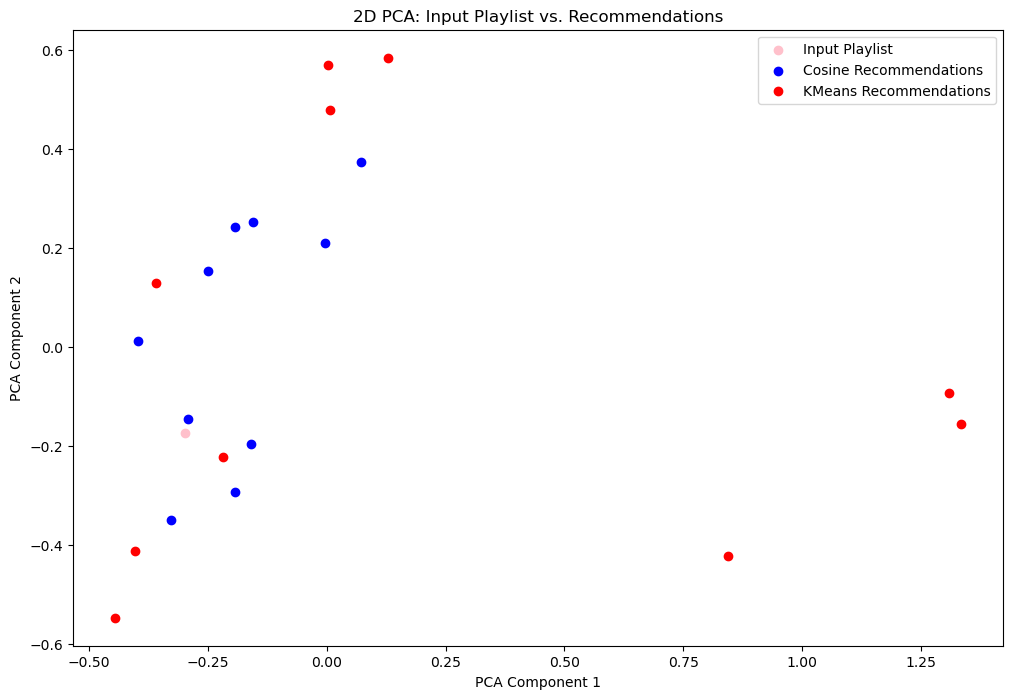

In [93]:
visualize_recommendations(song_id, reco_ids_cosine, reco_ids_kmeans, features)

### Getting 5 song playlist recommendation from random playlist of size 5

In [94]:
# Cosine similarity model

playlist_ids = get_random_playlist(song_names, 5) 
playlist_vector, features_without = get_playlist_vector(features, playlist_ids)
reco_ids_cosine = get_similar_songs(playlist_vector, features_without, 5)
print_songs(song_names, reco_ids_cosine, title_string = "\nRecommended Songs: \n")

Input Songs: 

1. Heaven by Avicii
Album: pov: it's 2019

2. Same Girl by Randy Newman
Album: Trouble in Paradise

3. MONEY by LISA
Album: LALISA

4. The Rock Show by blink-182
Album: Take Off Your Pants And Jacket

5. Me Muero by Nigga, Flex
Album: Te Quiero


Recommended Songs: 

1. This Is What You Came For by Calvin Harris, Rihanna
Album: This Is What You Came For

2. no tears left to cry by Ariana Grande
Album: Sweetener

3. Da Da Da - Remix by Mikis by Tanir, Tyomcha, Mikis
Album: Da Da Da (Remix by Mikis)

4. Can't You See Me? by TOMORROW X TOGETHER
Album: The Dream Chapter: ETERNITY

5. ON (Feat. Sia) by BTS, Sia
Album: MAP OF THE SOUL : 7



In [95]:
# K-means clustering + cosine similarity model

reco_ids_kmeans = get_cluster_recommendation(playlist_ids, features_copy, 5)
print_songs(song_names, reco_ids_kmeans, title_string = "\nRecommended Songs: \n")


Recommended Songs: 

1. How Long by Charlie Puth
Album: Voicenotes

2. Rasputin by Majestic, Boney M.
Album: Rasputin

3. WandaVision! by Kristen Anderson-Lopez, Robert Lopez, Sara Mann, Jessica Rotter, Cindy Bourquin, Elyse Willis, Laura Dickinson, Eric Bradley, Greg Whipple, Jasper Randall, Gerald White
Album: WandaVision: Episode 2 (Original Soundtrack)

4. Mayam Seidhayo by Vijay Antony, Sangeetha Rajeshwaran
Album: Velayudham (Original Motion Picture Soundtrack)

5. Adada Mazhaida (From "Paiya") by Yuvan Shankar Raja, Rahul Nambiar, Saindhavi
Album: My Playlist: Yuvanshankar Raja



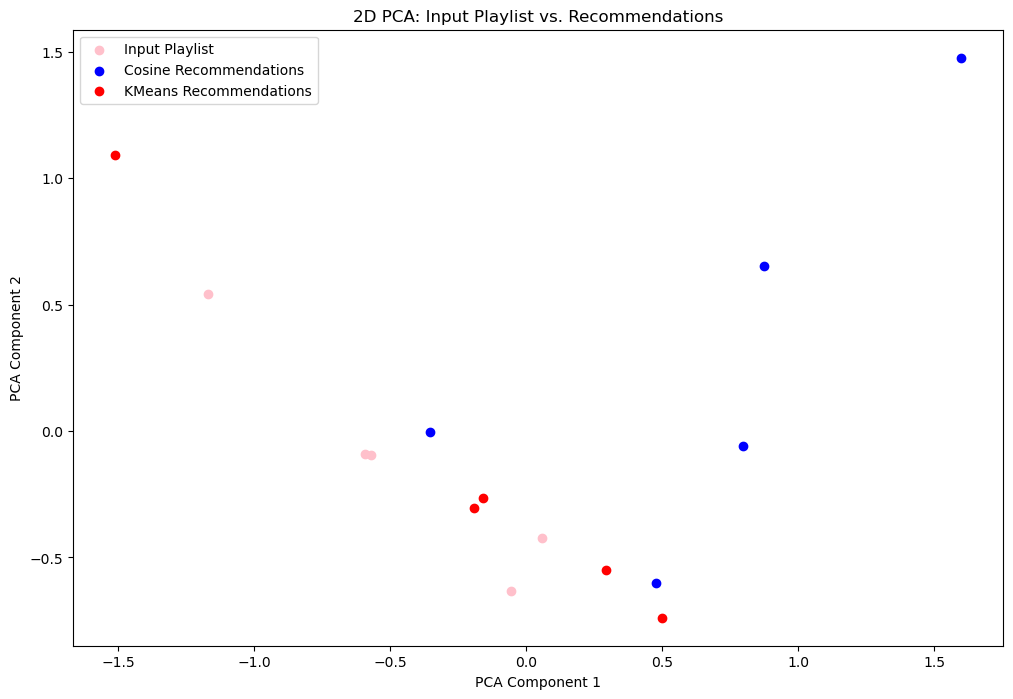

In [96]:
visualize_recommendations(playlist_ids, reco_ids_cosine, reco_ids_kmeans, features)

### Getting 5 song playlist recommendation from an already recommended playlist from a song

In [103]:
# Cosine similarity model

song_id = get_random_song(song_names) 
song_vector, features_without = get_song_vector (features, song_id) 
playlist_ids = get_similar_songs(song_vector, features_without, 5)
print_songs(song_names, playlist_ids, title_string = "\nFirst Recommended Playlist: \n")
print("\nRecommending again...\n")

playlist_vector, features_without = get_playlist_vector(features, playlist_ids)
reco_ids_cosine = get_similar_songs(playlist_vector, features_without, 5)
print_songs(song_names, reco_ids_cosine, title_string = "\nNew Recommended Songs: \n")

Input Song: 

1. 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft 8ft by Shane Mauss
Album: My Big Break


First Recommended Playlist: 

1. Old Couple by Billy Gardell
Album: Halftime

2. Cheese Babies and a Hot Boy by Matt Braunger
Album: Shovel Fighter

3. Domestitated by Todd Glass
Album: Todd Glass Talks About Stuff

4. A Little Help Please by Ali Siddiq
Album: Damaged Goods

5. Therapist, 'I Love You', And Thanksgiving by Dov Davidoff
Album: The Point Is


Recommending again...


New Recommended Songs: 

1. Superman and Passive Aggressive Man by Erikka Innes
Album: Sex With Nerds

2. Girl's Night by Iliza Shlesinger
Album: War Paint

3. The Gifted Child by Patton Oswalt
Album: Finest Hour

4. Lawn Mowing by Arnez J
Album: Racially Motivated

5. Africa by Arnez J
Album: Racially Motivated



In [104]:
# K-means clustering + cosine similarity model

reco_ids_kmeans = get_cluster_recommendation(playlist_ids, features_copy, 5)
print_songs(song_names, reco_ids_kmeans, title_string = "\nNew recommended songs based on previous playlist: \n")


New recommended songs based on previous playlist: 

1. Tea Party Website by Eugene Mirman
Album: An Evening of Comedy in a Fake Underground Laboratory

2. The Boy by Billy Gardell
Album: Halftime

3. Girl's Night by Iliza Shlesinger
Album: War Paint

4. True Gender Equality by Dan Cummins
Album: Get Outta Here; Devil!

5. The Gifted Child by Patton Oswalt
Album: Finest Hour



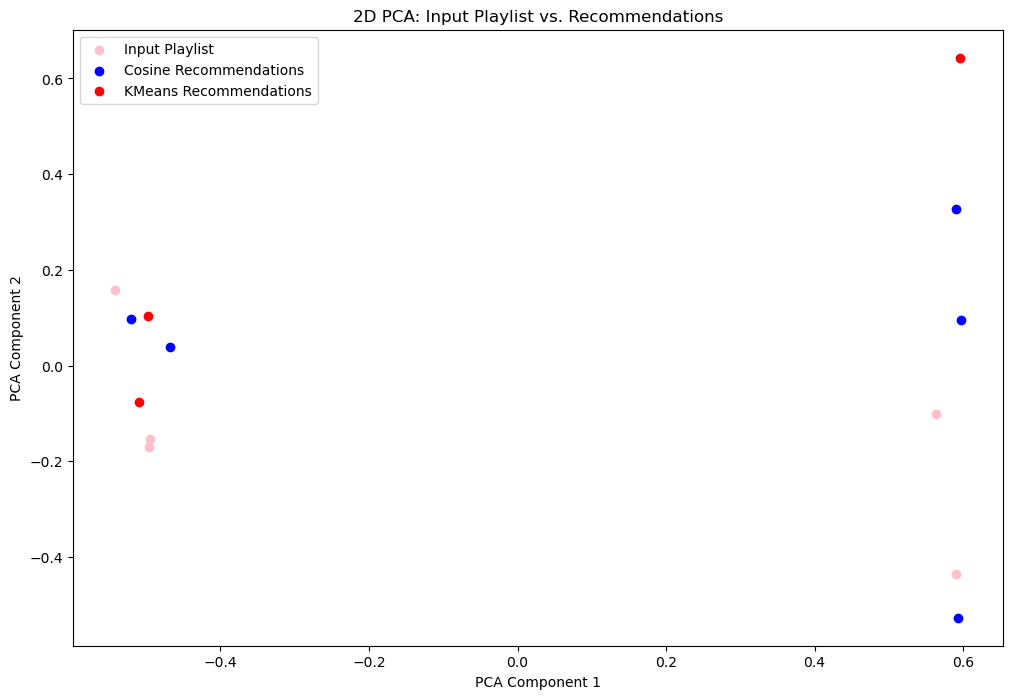

In [105]:
visualize_recommendations(playlist_ids, reco_ids_cosine, reco_ids_kmeans, features)